In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [109]:
df=pd.read_pickle('./dataset/00_feature_with_label.pkl')
df

,IMP_TYPE_OF_DECLARATION_1,IMP_TYPE_OF_DECLARATION_2,TRD_TIN_2,TRD_NAME_2,TRD_COUNTRY_2,TRD_ADDR_2,CUS_SHIPMENT_SPEC_4,CUS_TOTAL_NUMBER_OF_ITEMS_5,CUS_TOTAL_NUMBER_OF_PACKAGES_6,CUS_REF_NO_7,CON_TIN_8,CON_NAME_8,CON_COUNTRY_8,CON_ADDR_8,PER_TIN_9,PER_NAME_9,PER_COUNTRY_9,PER_ADDR_9,IMP_TRADING_COUNTRY_11,VAL_FINANCIAL_VALUE_12,VAL_CURRENCY_12,DNT_TIN_14,DNT_NAME_14,DNT_COUNTRY_14,DNT_ADDR_14,IMP_CNT_OF_DISPATCH_EXP_CD_15,IMP_COUNTRY_OF_ORIGIN_16,IMP_CONTAINER_FLAG_19,DEL_DELIVERY_TERM_CODE_20,DEL_PLACE_OF_DELIVERY_20,TOT_CURRENCY_22,TOT_FINANCIAL_VALUE_22,IMP_EXCHANGE_RATE_23,IMP_INLAND_TRANSPORT_MODE_25,IMP_TRANSPORT_MODE_AT_BODR_26,LOD_LOCATION_NAME_27,LOC_LOCATION_NAME_30,OFF_CODE_30,GDS_GOODS_DESCRIPTION_31,GDS_ITEM_NUMBER_32,COM_COMBINED_NOMENCLATURE_33,IDG_COUNTRY_OF_ORIGIN_34,GDS_GROSS_MASS_35,PRF_PREFERENCE_CODE_1,PRF_PREFERENCE_CODE_2,PRF_PREFERENCE_CODE_3,PRF_PREFERENCE_CODE_4,IDG_PROCEDURE_REQUESTED_37,IDG_PREVIOUS_PROCEDURE_37,IDG_ADD_NATIONAL_PROC_37,IDG_NET_MASS_38,IDG_QUOTA,ZQNTY,ZAUXUOM,FIN_FINANCIAL_VALUE_42,COR_FINANCIAL_VALUE,COR_CURRENCY,COV_CUST_VALUE_METHOD,STC_FINANCIAL_VALUE_46,IDG_STAT_VALUE_VAL_METH_46,CAL_TYPE_OF_TAX_47,CAL_TAX_BASE_47,CAL_RATE_OF_TAX_47,CAL_ADDITIONAL_RATE_OF_TAX_47,PAM_FINANCIAL_VALUE_47,CAL_METHOD_OF_PAYMENT_47,IMP_DATE_OF_DECLARATION_54,REP_TIN_54,PERSON_NAME_54,PERSON_POSITION_54,GEND_REFERENCE_54,GEND_ISSUE_DATE_54,ACCEPTANCE_DATE,LABEL
0,ИМ,NaN,NaN,ООО ВИП-ТРАНС,RU,НИЖНЕВАРТОВСК КУЗОВАТКИНА ДОМ 5 СТРОЕНИЕ 3,NaN,1,64.0,762235/140217/0000189,620010597,ООО ЧИТГАР,TJ,ИСТАРАВШАН БУСТОН 107,620010597,ООО ЧИТГАР,TJ,ИСТАРАВШАН БУСТОН 107,RU,345737.87,TJS,620010597,ООО ЧИТГАР,TJ,ИСТАРАВШАН БУСТОН 107,RU,RU,0.0,CPT,СТ.ОРСК-НОВЫЙ ГОРОД,RUB,2046973.0,0.1347,20.0,20.0,NaN,Ж/Д ДЖ.РАСУЛОВ,762235,"ПЛИТЫ ДРЕВЕСНО-СТРУЖЕЧНЫЕ, ЛАМИНИРОВАННЫЕ ГОСТ...",1,4410110009,RU,128000.0,О,Г,О,О,40,0,44,121145.0,NaN,185.52,113.0,2046973.0,345737.87,TJS,1.0,43705.0,1.0,10.0,345737.87,70.00,SP,553.76,БН,20170214,510000091,ВАХОБОВ ШАВКАТ ТУРСУНБОЕВИЧ,СПЕЦИАЛИСТ ПО Т/О,СГ01/007,20150624.0,"14.02.17 11:55:18,551000000",0
1,ИМ,NaN,NaN,ООО ВИП-ТРАНС,RU,НИЖНЕВАРТОВСК КУЗОВАТКИНА ДОМ 5 СТРОЕНИЕ 3,NaN,1,64.0,762235/140217/0000189,620010597,ООО ЧИТГАР,TJ,ИСТАРАВШАН БУСТОН 107,620010597,ООО ЧИТГАР,TJ,ИСТАРАВШАН БУСТОН 107,RU,345737.87,TJS,620010597,ООО ЧИТГАР,TJ,ИСТАРАВШАН БУСТОН 107,RU,RU,0.0,CPT,СТ.ОРСК-НОВЫЙ ГОРОД,RUB,2046973.0,0.1347,20.0,20.0,NaN,Ж/Д ДЖ.РАСУЛОВ,762235,"ПЛИТЫ ДРЕВЕСНО-СТРУЖЕЧНЫЕ, ЛАМИНИРОВАННЫЕ ГОСТ...",1,4410110009,RU,128000.0,О,Г,О,О,40,0,44,121145.0,NaN,185.52,113.0,2046973.0,345737.87,TJS,1.0,43705.0,1.0,20.0,345737.87,5.00,AD,17286.89,УН,20170214,510000091,ВАХОБОВ ШАВКАТ ТУРСУНБОЕВИЧ,СПЕЦИАЛИСТ ПО Т/О,СГ01/007,20150624.0,"14.02.17 11:55:18,551000000",0
2,ИМ,NaN,NaN,ООО ВИП-ТРАНС,RU,НИЖНЕВАРТОВСК КУЗОВАТКИНА ДОМ 5 СТРОЕНИЕ 3,NaN,1,64.0,762235/140217/0000189,620010597,ООО ЧИТГАР,TJ,ИСТАРАВШАН БУСТОН 107,620010597,ООО ЧИТГАР,TJ,ИСТАРАВШАН БУСТОН 107,RU,345737.87,TJS,620010597,ООО ЧИТГАР,TJ,ИСТАРАВШАН БУСТОН 107,RU,RU,0.0,CPT,СТ.ОРСК-НОВЫЙ ГОРОД,RUB,2046973.0,0.1347,20.0,20.0,NaN,Ж/Д ДЖ.РАСУЛОВ,762235,"ПЛИТЫ ДРЕВЕСНО-СТРУЖЕЧНЫЕ, ЛАМИНИРОВАННЫЕ ГОСТ...",1,4410110009,RU,128000.0,О,Г,О,О,40,0,44,121145.0,NaN,185.52,113.0,2046973.0,345737.87,TJS,1.0,43705.0,1.0,30.0,345737.87,18.00,AD,62232.82,БН,20170214,510000091,ВАХОБОВ ШАВКАТ ТУРСУНБОЕВИЧ,СПЕЦИАЛИСТ ПО Т/О,СГ01/007,20150624.0,"14.02.17 11:55:18,551000000",0
3,ИМ,NaN,NaN,""" М/С АКИДЖ ДУТЕ МИЛЛС ЛТД"",Ч/З БАНДАР АБАС П/...",BD,АББАС,NaN,1,1213.0,762241/140217/0100665,560002910,"ООО ""РОСТОИ СУГД""",TJ,ГУЛИСТОН И.СОМОНИ 1,560002910,"ООО ""РОСТОИ СУГД""",TJ,ГУЛИСТОН И.СОМОНИ 1,AE,346493.04,TJS,560002910,"ООО ""РОСТОИ СУГД""",TJ,ГУЛИСТОН И.СОМОНИ 1,BD,BD,0.0,CIP,ГУЛИСТОН,USD,43800.0,7.9108,20.0,20.0,NaN,Ж/Д ХУДЖАНД,762241,"ВОЛОКНО СИНТЕТИЧЕСКОЕ,ИЗ ДЖУТА",1,5307200000,BD,46640.0,О,А,О,О,40,0,0,45000.0,NaN,NaN,NaN,43800.0,346493.04,TJS,1.0,43800.0,1.0,10.0,346493.04,70.00,SP,553.76,БН,20170214,510000091,САЙФИЕВА МАВЗУНА ШАРИФДЖАНОВНА,СПЕЦИАЛИСТ,СГ/01/007

# 다수 클래스 vs 소수 클래스 시각화

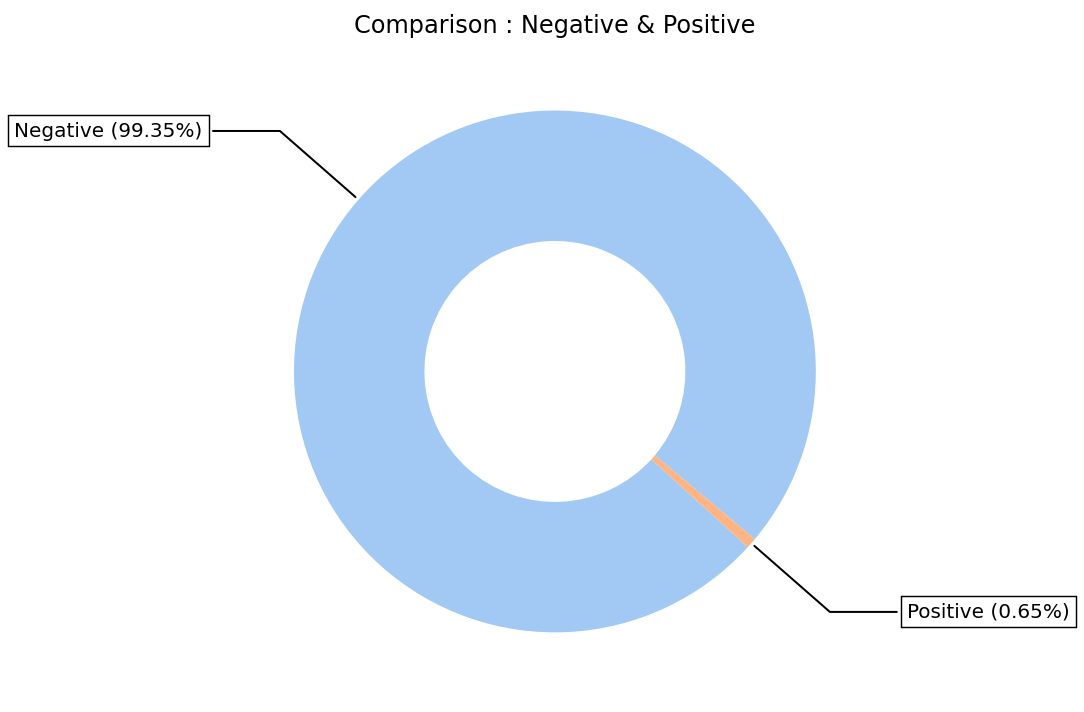

In [110]:
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

negative_ratio = round(((df.LABEL.value_counts()[0]/df.LABEL.value_counts().sum())*100),2)
positive_ratio = round(((df.LABEL.value_counts()[1]/df.LABEL.value_counts().sum())*100),2)

label = ["Negative ({}%)".format(negative_ratio),
         "Positive ({}%)".format(positive_ratio)]

data = [df.LABEL.value_counts()[0], df.LABEL.value_counts()[1]]

color = sns.color_palette("pastel", len(label))

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40, colors=color)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(label[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Comparison : Negative & Positive")

plt.show()

- LABEL 칼럼 내 요소들의 비교 결과 위법물에 해당하는 건수는 전체의 0.65%로 굉장히 적은 비중을 차지

# 상관계수 heatmap

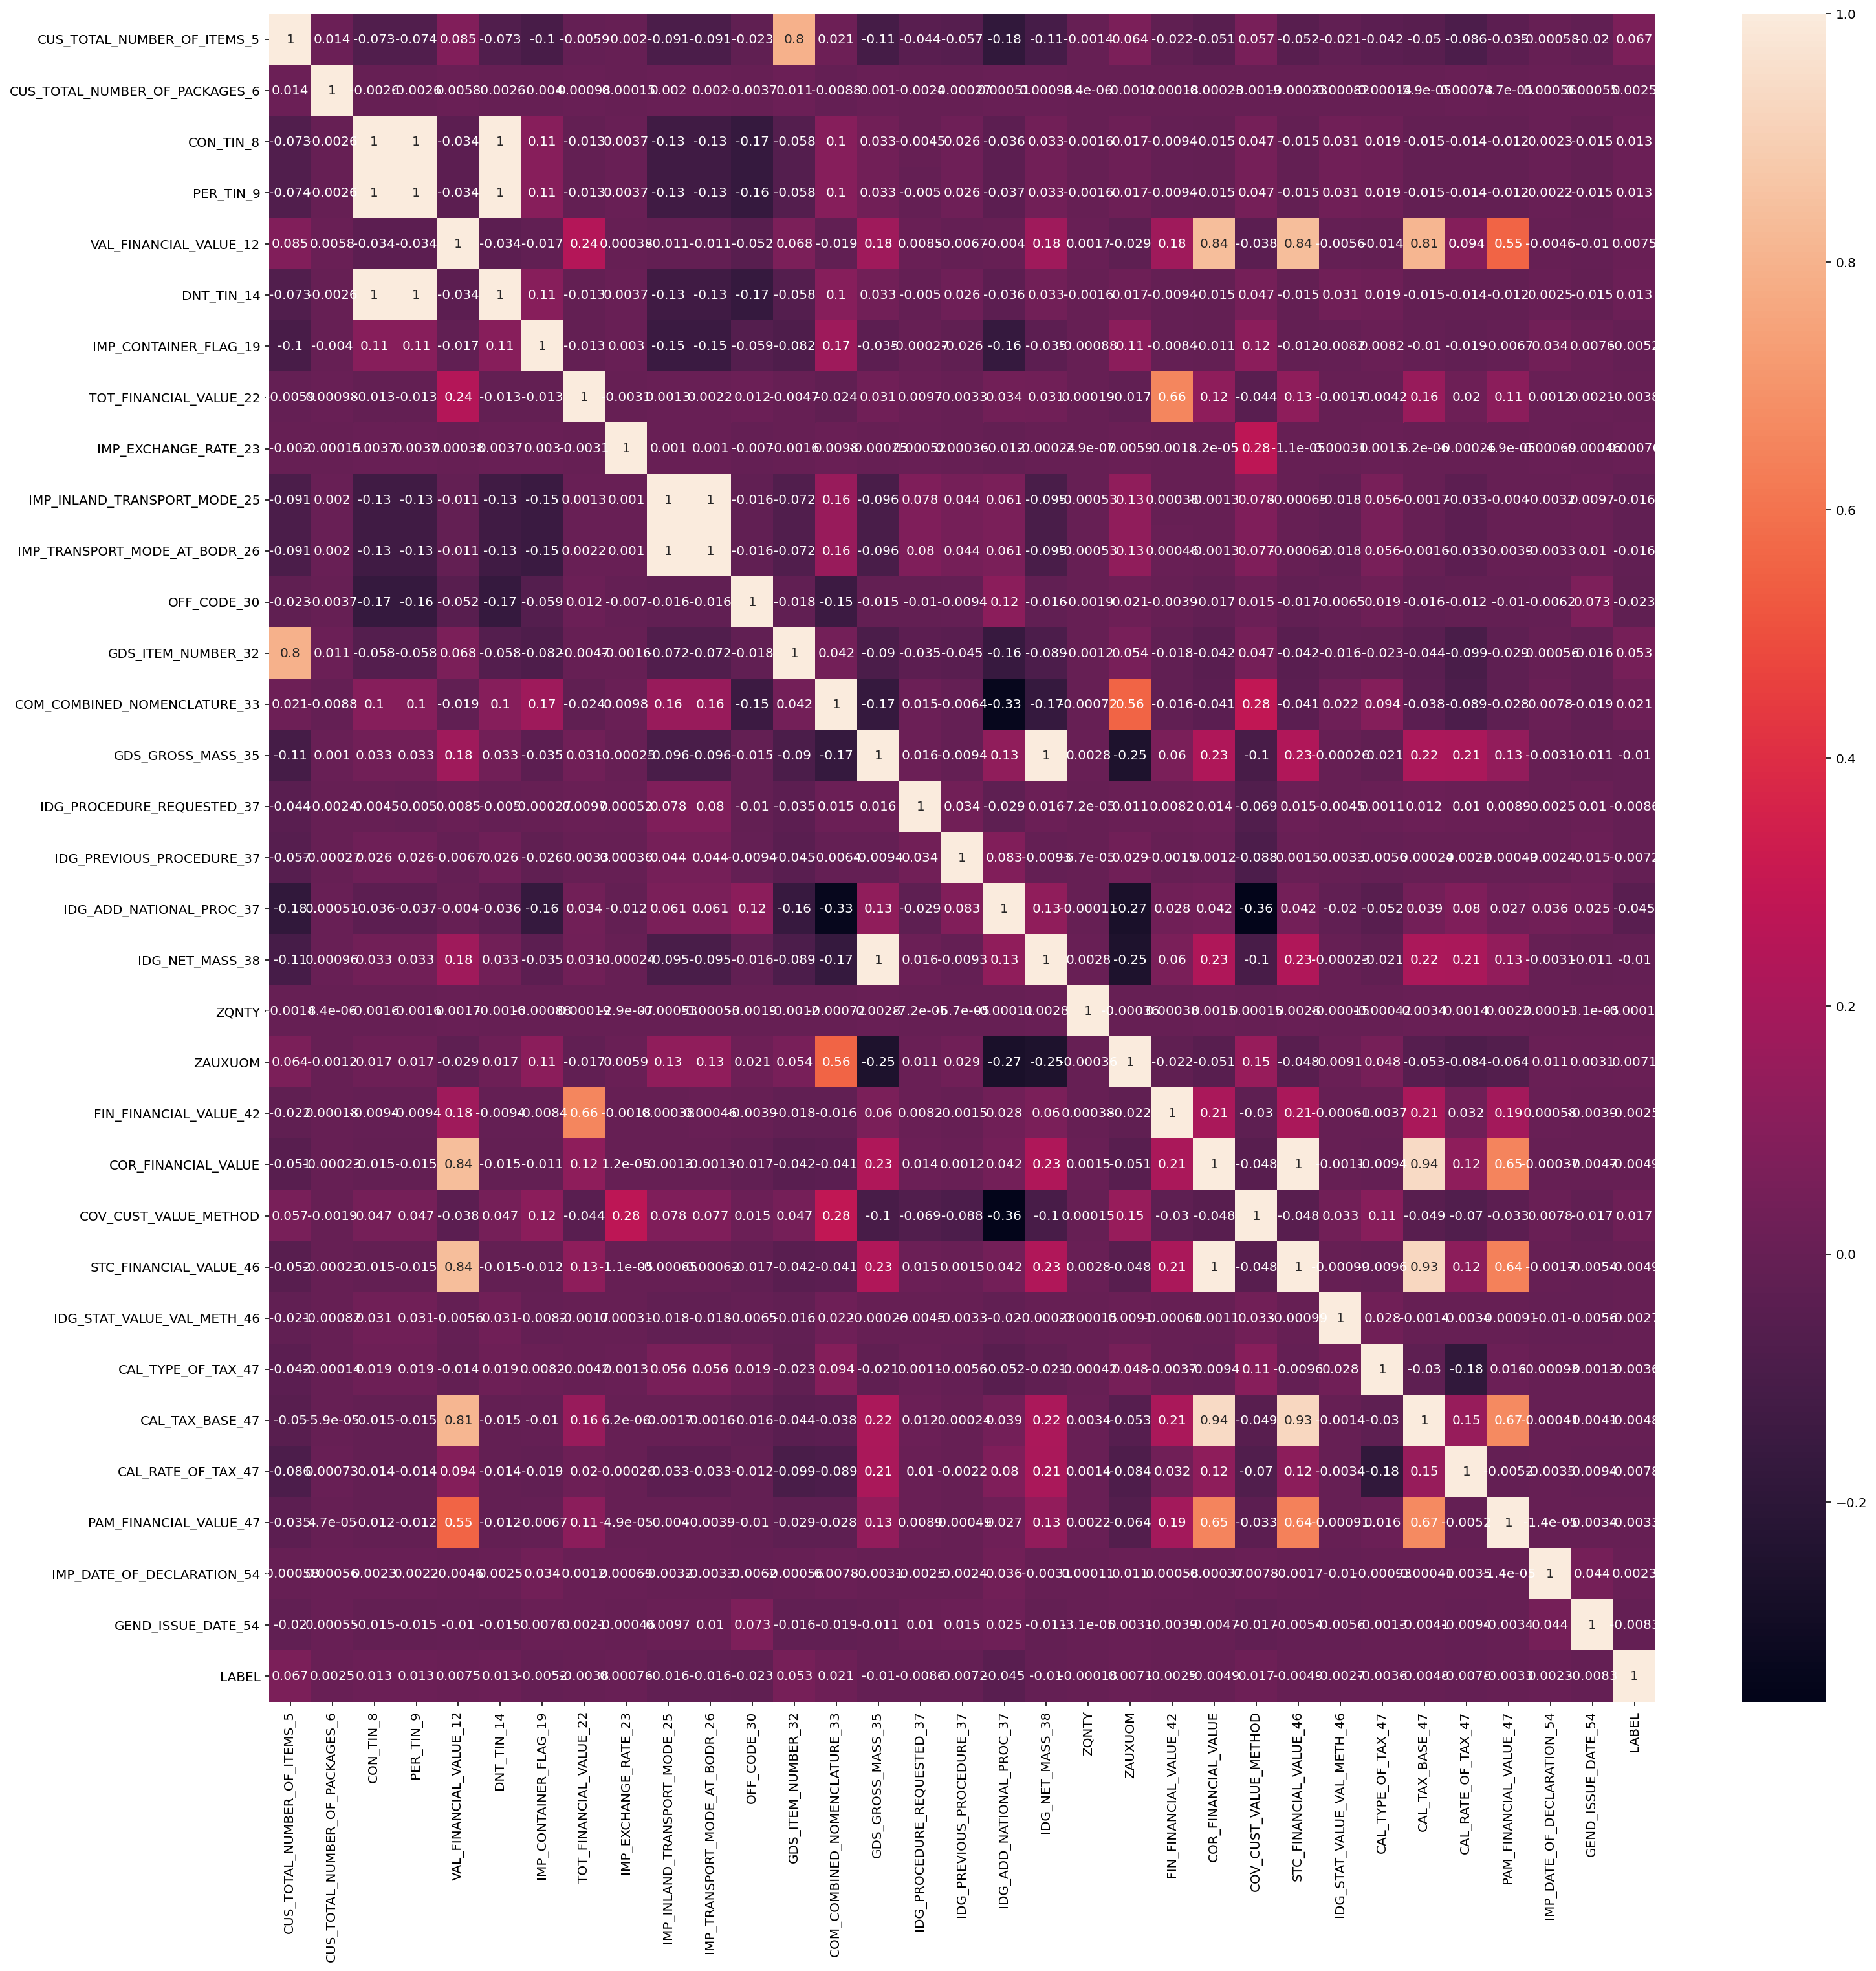

In [111]:
fig=plt.figure(figsize=(24,24))
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

- 위의 파이차트에서 살펴볼 수 있듯이 LABEL 칼럼의 값들은 변동이 별로 없음
- 따라서 상관관계 분석 시에도 거의 상관성을 찾아볼 수 없음
- 이를 해결하기 위하여 아래와 같은 사항을 실시
    - 1 (positive) 값만 추출하여 DataFrame 작성
    - LABEL 값을 적발코드로 치환한 후 상관관계 분석

In [112]:
# 전체 feature 데이터인 df에서 LABEL = 1 인 sample들만 추출
positive_df=df[df['LABEL']==1]
# index를 다시 리셋
positive_df.reset_index(drop=True,inplace=True)
positive_df

,IMP_TYPE_OF_DECLARATION_1,IMP_TYPE_OF_DECLARATION_2,TRD_TIN_2,TRD_NAME_2,TRD_COUNTRY_2,TRD_ADDR_2,CUS_SHIPMENT_SPEC_4,CUS_TOTAL_NUMBER_OF_ITEMS_5,CUS_TOTAL_NUMBER_OF_PACKAGES_6,CUS_REF_NO_7,CON_TIN_8,CON_NAME_8,CON_COUNTRY_8,CON_ADDR_8,PER_TIN_9,PER_NAME_9,PER_COUNTRY_9,PER_ADDR_9,IMP_TRADING_COUNTRY_11,VAL_FINANCIAL_VALUE_12,VAL_CURRENCY_12,DNT_TIN_14,DNT_NAME_14,DNT_COUNTRY_14,DNT_ADDR_14,IMP_CNT_OF_DISPATCH_EXP_CD_15,IMP_COUNTRY_OF_ORIGIN_16,IMP_CONTAINER_FLAG_19,DEL_DELIVERY_TERM_CODE_20,DEL_PLACE_OF_DELIVERY_20,TOT_CURRENCY_22,TOT_FINANCIAL_VALUE_22,IMP_EXCHANGE_RATE_23,IMP_INLAND_TRANSPORT_MODE_25,IMP_TRANSPORT_MODE_AT_BODR_26,LOD_LOCATION_NAME_27,LOC_LOCATION_NAME_30,OFF_CODE_30,GDS_GOODS_DESCRIPTION_31,GDS_ITEM_NUMBER_32,COM_COMBINED_NOMENCLATURE_33,IDG_COUNTRY_OF_ORIGIN_34,GDS_GROSS_MASS_35,PRF_PREFERENCE_CODE_1,PRF_PREFERENCE_CODE_2,PRF_PREFERENCE_CODE_3,PRF_PREFERENCE_CODE_4,IDG_PROCEDURE_REQUESTED_37,IDG_PREVIOUS_PROCEDURE_37,IDG_ADD_NATIONAL_PROC_37,IDG_NET_MASS_38,IDG_QUOTA,ZQNTY,ZAUXUOM,FIN_FINANCIAL_VALUE_42,COR_FINANCIAL_VALUE,COR_CURRENCY,COV_CUST_VALUE_METHOD,STC_FINANCIAL_VALUE_46,IDG_STAT_VALUE_VAL_METH_46,CAL_TYPE_OF_TAX_47,CAL_TAX_BASE_47,CAL_RATE_OF_TAX_47,CAL_ADDITIONAL_RATE_OF_TAX_47,PAM_FINANCIAL_VALUE_47,CAL_METHOD_OF_PAYMENT_47,IMP_DATE_OF_DECLARATION_54,REP_TIN_54,PERSON_NAME_54,PERSON_POSITION_54,GEND_REFERENCE_54,GEND_ISSUE_DATE_54,ACCEPTANCE_DATE,LABEL
0,ИМ,NaN,NaN,АМИН ТАДЖ ЧИНЕ,IR,МАШХАД,NaN,3,2170.0,762314/260117/0000047,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХОДНАЯ 3,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХОДНАЯ 3,IR,165706.86,TJS,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХОДНАЯ 3,IR,IR,0.0,CIP,ЯВАН,USD,21004.0,7.8893,20.0,20.0,NaN,Ж/Д СТ /ЯВАН/,762314,РОЛИКИ ПЛАСТМАССВЫЕ,1,3919909000,IR,28440.0,О,О,А,О,40,0,0,28440.0,NaN,NaN,NaN,16000.0,126228.80,TJS,NaN,16000.0,1.0,10.0,165706.86,70.0,SP,552.25,КТ,20170126,280005578,САЛИХОВА ДЖИЛЛО РУСТАМОВНА,СП.ПО Т\О,ХТ/02/0054,20120605.0,"26.01.17 16:16:05,218000000",1
1,ИМ,NaN,NaN,АМИН ТАДЖ ЧИНЕ,IR,МАШХАД,NaN,3,2170.0,762314/260117/0000047,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХОДНАЯ 3,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХОДНАЯ 3,IR,165706.86,TJS,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХОДНАЯ 3,IR,IR,0.0,CIP,ЯВАН,USD,21004.0,7.8893,20.0,20.0,NaN,Ж/Д СТ /ЯВАН/,762314,РОЛИКИ ПЛАСТМАССВЫЕ,1,3919909000,IR,28440.0,О,О,А,О,40,0,0,28440.0,NaN,NaN,NaN,16000.0,126228.80,TJS,NaN,16000.0,1.0,20.0,126228.80,10.0,AD,12622.88,КТ,20170126,280005578,САЛИХОВА ДЖИЛЛО РУСТАМОВНА,СП.ПО Т\О,ХТ/02/0054,20120605.0,"26.01.17 16:16:05,218000000",1
2,ИМ,NaN,NaN,АМИН ТАДЖ ЧИНЕ,IR,МАШХАД,NaN,3,2170.0,762314/260117/0000047,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХОДНАЯ 3,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХОДНАЯ 3,IR,165706.86,TJS,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХОДНАЯ 3,IR,IR,0.0,CIP,ЯВАН,USD,21004.0,7.8893,20.0,20.0,NaN,Ж/Д СТ /ЯВАН/,762314,РОЛИКИ ПЛАСТМАССВЫЕ,1,3919909000,IR,28440.0,О,О,А,О,40,0,0,28440.0,NaN,NaN,NaN,16000.0,126228.80,TJS,NaN,16000.0,1.0,30.0,138851.68,18.0,AD,24993.30,КТ,20170126,280005578,САЛИХОВА ДЖИЛЛО РУСТАМОВНА,СП.ПО Т\О,ХТ/02/0054,20120605.0,"26.01.17 16:16:05,218000000",1
3,ИМ,NaN,NaN,АМИН ТАДЖ ЧИНЕ,IR,МАШХАД,NaN,3,2170.0,762314/260117/0000047,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХОДНАЯ 3,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХОДНАЯ 3,IR,165706.86,TJS,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХОДНАЯ 3,IR,IR,0.0,CIP,ЯВАН,USD,21004.0,7.8893,20.0,20.0,NaN,Ж/Д СТ /ЯВАН/,762314,МЫЛО ХОЗЯЙСТВЕННОЕ,2,3401190000,IR,9.0,О,О,А,О,40,0,0,9.0,NaN,NaN,NaN,4.0,31.56,TJS,NaN,4.0,1.0,20.0,31.56,5.0,AD,1.58,КТ,20170126,280005578,САЛИХОВА ДЖИЛЛО РУСТАМОВНА,СП.ПО Т\О,ХТ/02/0054,20120605.0,"26.01.17 16:16:05,218000000",1
4,ИМ,NaN,NaN,АМИН ТАДЖ ЧИНЕ,IR,МАШХАД,NaN,3,2170.0,762314/260117/0000047,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХОДНАЯ 3,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХОДНАЯ 3,IR,165706.86,TJS,3002429

In [113]:
# 적발내역 데이터를 불러와 detection_df에 저장
detection_df=pd.read_pickle('./dataset/01_detection_detail.pkl')
detection_df

,YEAR,IMP_COMPANY,NUMB_OF_DETECTED,CUSTOMS_CODE,CUST_NUMBER,HS_CODE,GOODS,INSPECTION_RESULT_CODE,VIOLATIONS
0,2019.0,"ЧДММ ""Корафзо""",1,762118.0,762118/200117/0000002,6907100000,Кафел,C202,Недостоверная классификация товара (код товара)
1,2019.0,"ЧДММ ""Рахмат И К""",1,762118.0,762118/040617/0000012,6907100000,"Кафел, камни.",C202,Недостоверная классификация товара (код товара)
2,2019.0,"ЧДММ ""Сохтмони водии вахш-2015""",1,762118.0,762118/260417/0100105,3903909000,Полипропилен-гранула,C202,Недостоверная классификация товара (код товара)
3,2019.0,"ЧДММ ""Сайри Диёр""",1,762118.0,762118/280518/0000230,3903909000,Полипропилен-гранула,C104,Незаконное применение таможеных преференций
4,2019.0,"ЧДММ ""Сайри Диёр""",2,762118.0,762118/300518/0000232,3903909000,Полипропилен-гранула,C104,Незаконное применение таможеных преференций
...,...,...,...,...,...,...,...,...,...
398,2020.0,ЧДММ Вахдат 2020,1,762230.0,762230/270320/0000483,4417000000,ручка от лопаты,C204,Занижения таможенной стоимости
399,2020.0,ЧДММ Кафолат Содирот Воридот,1,762230.0,762230/130520/0000635,8708299009,автозапчасть,C204,Занижения таможенной стоимости
400,2020.0,ЧДММ Сафари,1,762249.0,762249/290319/0000479,3208209009,Краска,C204,Занижения таможенной стоимости
401,2020.0,ЧДММ Сафари,2,762249.0,762249/120620/0001093,3208209009,Краска,C204,Занижения таможенной стоимости


In [114]:
# 신고서 번호가 중복되는 sample들 403개 존재 (하나의 basket 안에서 두개 이상의 위법물이 적발 된 것으로 추정)
# 하지만 LABEL 분류 기준은 신고서 번호 기준이므로 중복은 고려하지 않고 적발 코드로 치환 진행
len(detection_df['CUST_NUMBER'].duplicated(keep=False))

403

In [115]:
# CODE_LABEL 칼럼 생성
positive_df['CODE_LABEL'] = 0

for i in range(len(positive_df)):
  for j in range(len(detection_df)):
    # positive_df의 신고서 번호가 detection_df의 신고서 번호와 일치하는 경우
    if positive_df['CUS_REF_NO_7'][i]==detection_df['CUST_NUMBER'][j]:
      # 해당 신고서 번호에 해당하는 적발 코드를 CODE_LABEL 칼럼의 값으로 입력
      positive_df['CODE_LABEL'][i]=detection_df['INSPECTION_RESULT_CODE'][j]
positive_df

,IMP_TYPE_OF_DECLARATION_1,IMP_TYPE_OF_DECLARATION_2,TRD_TIN_2,TRD_NAME_2,TRD_COUNTRY_2,TRD_ADDR_2,CUS_SHIPMENT_SPEC_4,CUS_TOTAL_NUMBER_OF_ITEMS_5,CUS_TOTAL_NUMBER_OF_PACKAGES_6,CUS_REF_NO_7,CON_TIN_8,CON_NAME_8,CON_COUNTRY_8,CON_ADDR_8,PER_TIN_9,PER_NAME_9,PER_COUNTRY_9,PER_ADDR_9,IMP_TRADING_COUNTRY_11,VAL_FINANCIAL_VALUE_12,VAL_CURRENCY_12,DNT_TIN_14,DNT_NAME_14,DNT_COUNTRY_14,DNT_ADDR_14,IMP_CNT_OF_DISPATCH_EXP_CD_15,IMP_COUNTRY_OF_ORIGIN_16,IMP_CONTAINER_FLAG_19,DEL_DELIVERY_TERM_CODE_20,DEL_PLACE_OF_DELIVERY_20,TOT_CURRENCY_22,TOT_FINANCIAL_VALUE_22,IMP_EXCHANGE_RATE_23,IMP_INLAND_TRANSPORT_MODE_25,IMP_TRANSPORT_MODE_AT_BODR_26,LOD_LOCATION_NAME_27,LOC_LOCATION_NAME_30,OFF_CODE_30,GDS_GOODS_DESCRIPTION_31,GDS_ITEM_NUMBER_32,COM_COMBINED_NOMENCLATURE_33,IDG_COUNTRY_OF_ORIGIN_34,GDS_GROSS_MASS_35,PRF_PREFERENCE_CODE_1,PRF_PREFERENCE_CODE_2,PRF_PREFERENCE_CODE_3,PRF_PREFERENCE_CODE_4,IDG_PROCEDURE_REQUESTED_37,IDG_PREVIOUS_PROCEDURE_37,IDG_ADD_NATIONAL_PROC_37,IDG_NET_MASS_38,IDG_QUOTA,ZQNTY,ZAUXUOM,FIN_FINANCIAL_VALUE_42,COR_FINANCIAL_VALUE,COR_CURRENCY,COV_CUST_VALUE_METHOD,STC_FINANCIAL_VALUE_46,IDG_STAT_VALUE_VAL_METH_46,CAL_TYPE_OF_TAX_47,CAL_TAX_BASE_47,CAL_RATE_OF_TAX_47,CAL_ADDITIONAL_RATE_OF_TAX_47,PAM_FINANCIAL_VALUE_47,CAL_METHOD_OF_PAYMENT_47,IMP_DATE_OF_DECLARATION_54,REP_TIN_54,PERSON_NAME_54,PERSON_POSITION_54,GEND_REFERENCE_54,GEND_ISSUE_DATE_54,ACCEPTANCE_DATE,LABEL,CODE_LABEL
0,ИМ,NaN,NaN,АМИН ТАДЖ ЧИНЕ,IR,МАШХАД,NaN,3,2170.0,762314/260117/0000047,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХОДНАЯ 3,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХОДНАЯ 3,IR,165706.86,TJS,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХОДНАЯ 3,IR,IR,0.0,CIP,ЯВАН,USD,21004.0,7.8893,20.0,20.0,NaN,Ж/Д СТ /ЯВАН/,762314,РОЛИКИ ПЛАСТМАССВЫЕ,1,3919909000,IR,28440.0,О,О,А,О,40,0,0,28440.0,NaN,NaN,NaN,16000.0,126228.80,TJS,NaN,16000.0,1.0,10.0,165706.86,70.0,SP,552.25,КТ,20170126,280005578,САЛИХОВА ДЖИЛЛО РУСТАМОВНА,СП.ПО Т\О,ХТ/02/0054,20120605.0,"26.01.17 16:16:05,218000000",1,C202
1,ИМ,NaN,NaN,АМИН ТАДЖ ЧИНЕ,IR,МАШХАД,NaN,3,2170.0,762314/260117/0000047,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХОДНАЯ 3,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХОДНАЯ 3,IR,165706.86,TJS,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХОДНАЯ 3,IR,IR,0.0,CIP,ЯВАН,USD,21004.0,7.8893,20.0,20.0,NaN,Ж/Д СТ /ЯВАН/,762314,РОЛИКИ ПЛАСТМАССВЫЕ,1,3919909000,IR,28440.0,О,О,А,О,40,0,0,28440.0,NaN,NaN,NaN,16000.0,126228.80,TJS,NaN,16000.0,1.0,20.0,126228.80,10.0,AD,12622.88,КТ,20170126,280005578,САЛИХОВА ДЖИЛЛО РУСТАМОВНА,СП.ПО Т\О,ХТ/02/0054,20120605.0,"26.01.17 16:16:05,218000000",1,C202
2,ИМ,NaN,NaN,АМИН ТАДЖ ЧИНЕ,IR,МАШХАД,NaN,3,2170.0,762314/260117/0000047,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХОДНАЯ 3,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХОДНАЯ 3,IR,165706.86,TJS,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХОДНАЯ 3,IR,IR,0.0,CIP,ЯВАН,USD,21004.0,7.8893,20.0,20.0,NaN,Ж/Д СТ /ЯВАН/,762314,РОЛИКИ ПЛАСТМАССВЫЕ,1,3919909000,IR,28440.0,О,О,А,О,40,0,0,28440.0,NaN,NaN,NaN,16000.0,126228.80,TJS,NaN,16000.0,1.0,30.0,138851.68,18.0,AD,24993.30,КТ,20170126,280005578,САЛИХОВА ДЖИЛЛО РУСТАМОВНА,СП.ПО Т\О,ХТ/02/0054,20120605.0,"26.01.17 16:16:05,218000000",1,C202
3,ИМ,NaN,NaN,АМИН ТАДЖ ЧИНЕ,IR,МАШХАД,NaN,3,2170.0,762314/260117/0000047,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХОДНАЯ 3,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХОДНАЯ 3,IR,165706.86,TJS,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХОДНАЯ 3,IR,IR,0.0,CIP,ЯВАН,USD,21004.0,7.8893,20.0,20.0,NaN,Ж/Д СТ /ЯВАН/,762314,МЫЛО ХОЗЯЙСТВЕННОЕ,2,3401190000,IR,9.0,О,О,А,О,40,0,0,9.0,NaN,NaN,NaN,4.0,31.56,TJS,NaN,4.0,1.0,20.0,31.56,5.0,AD,1.58,КТ,20170126,280005578,САЛИХОВА ДЖИЛЛО РУСТАМОВНА,СП.ПО Т\О,ХТ/02/0054,20120605.0,"26.01.17 16:16:05,218000000",1,C202
4,ИМ,NaN,NaN,АМИН ТАДЖ ЧИНЕ,IR,МАШХАД,NaN,3,2170.0,762314/260117/0000047,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХОДНАЯ 3,30024291,"ООО ""ИРФОН-РУСТАМ""",TJ,ДУШАНБЕ ЮЖНО ОБХО

In [116]:
# positive_df의 복사본 생성
positive_copy = positive_df.copy()
# null 값이 극단적으로 높은 칼럼들 삭제
positive_copy.drop(columns=['IMP_TYPE_OF_DECLARATION_2','CUS_SHIPMENT_SPEC_4','LOD_LOCATION_NAME_27','IDG_QUOTA'],inplace=True)

In [117]:
# dtype = object인 칼럼들만 추출
tmp_df=positive_copy.select_dtypes(include='object')
# Label Encoding을 위해 null 값을 'nan' 으로 치환
for column_name in list(tmp_df.columns):
  tmp_df[str(column_name)].fillna('nan',inplace=True)
# Label Encoding을 위해 DataFrame 내 모든 요소를 str로 변형
tmp_df = tmp_df.astype('str')

In [118]:
# Label Encoding을 위한 사용자 함수 작성
from sklearn.preprocessing import LabelEncoder

def label_encoder(df,column_name):
  value = LabelEncoder().fit_transform(df[str(column_name)])
  df[str(column_name)] = value
  return df

In [119]:
# object인 칼럼들을 전부 Label Encoding
for column_name in list(tmp_df.columns):
  tmp_df=label_encoder(tmp_df,column_name)
tmp_df

,IMP_TYPE_OF_DECLARATION_1,TRD_TIN_2,TRD_NAME_2,TRD_COUNTRY_2,TRD_ADDR_2,CUS_REF_NO_7,CON_NAME_8,CON_COUNTRY_8,CON_ADDR_8,PER_NAME_9,PER_COUNTRY_9,PER_ADDR_9,IMP_TRADING_COUNTRY_11,VAL_CURRENCY_12,DNT_NAME_14,DNT_COUNTRY_14,DNT_ADDR_14,IMP_CNT_OF_DISPATCH_EXP_CD_15,IMP_COUNTRY_OF_ORIGIN_16,DEL_DELIVERY_TERM_CODE_20,DEL_PLACE_OF_DELIVERY_20,TOT_CURRENCY_22,LOC_LOCATION_NAME_30,GDS_GOODS_DESCRIPTION_31,IDG_COUNTRY_OF_ORIGIN_34,PRF_PREFERENCE_CODE_1,PRF_PREFERENCE_CODE_2,PRF_PREFERENCE_CODE_3,PRF_PREFERENCE_CODE_4,COR_CURRENCY,CAL_ADDITIONAL_RATE_OF_TAX_47,CAL_METHOD_OF_PAYMENT_47,REP_TIN_54,PERSON_NAME_54,PERSON_POSITION_54,GEND_REFERENCE_54,ACCEPTANCE_DATE,CODE_LABEL
0,0,5,89,11,63,301,87,3,106,34,0,109,8,0,72,0,107,11,11,1,61,2,18,3841,17,1,7,1,4,0,1,1,20,67,10,79,274,3
1,0,5,89,11,63,301,87,3,106,34,0,109,8,0,72,0,107,11,11,1,61,2,18,3841,17,1,7,1,4,0,0,1,20,67,10,79,274,3
2,0,5,89,11,63,301,87,3,106,34,0,109,8,0,72,0,107,11,11,1,61,2,18,3841,17,1,7,1,4,0,0,1,20,67,10,79,274,3
3,0,5,89,11,63,301,87,3,106,34,0,109,8,0,72,0,107,11,11,1,61,2,18,2051,17,1,7,1,4,0,0,1,20,67,10,79,274,3
4,0,5,89,11,63,301,87,3,106,34,0,109,8,0,72,0,107,11,11,1,61,2,18,2051,17,1,7,1,4,0,0,1,20,67,10,79,274,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13956,0,5,207,15,18,238,110,3,128,55,0,129,13,0,96,0,126,15,6,2,60,0,44,1495,23,1,2,2,4,0,0,0,5,1,26,32,108,4
13957,0,5,207,15,18,238,110,3,128,55,0,129,13,0,96,0,126,15,6,2,60,0,44,1745,23,1,2,2,4,0,0,2,5,1,26,32,108,4
13958,0,5,207,15,18,238,110,3,128,55,0,129,13,0,96,0,126,15,6,2,60,0,44,1745,23,1,2,2,4,0,0,0,5,1,26,32,108,4
13959,0,5,207,15,18,238,110,3,128,55,0,129,13,0,96,0,126,15,6,2,60,0,44,5050,23,1,2,2,4,0,0,2,5,1,26,32,108,4


In [120]:
# 추출하여 Label Encoding 한 칼럼들을 다시 positive_copy DataFrame에 대입
for i in range(len(positive_copy.columns)):
  for j in range(len(tmp_df.columns)):
    # positive_copy의 i번째 칼럼이 tmp_df의 j번째 칼럼과 같다면
    if positive_copy.columns[i] == tmp_df.columns[j]:
      # positive_copy의 i번째 칼럼에 tmp_df의 j번째 칼럼을 대입 
      positive_copy[str(positive_copy.columns[i])] = tmp_df[str(tmp_df.columns[j])]
    else : pass

In [121]:
# heatmap 작성
fig = plt.figure(figsize=(40,40))
%config InlineBackend.figure_format = 'retina'
corr = positive_copy.corr()
sns.heatmap(corr,annot=True)
plt.show()

Output hidden; open in https://colab.research.google.com to view.